# Implementação KNN SK-Learn

## Configurações Iniciais

Comando para exibir os gráficos gerados no próprio *notebook*.

In [1]:
%matplotlib inline

Pacotes que serão usados para importação do *dataset*, tratamento de vetores, seleção de *features*, método de classificação e métricas a serem utilizadas.

In [2]:
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA

In [3]:
random.seed(0)

## Pré-Processamento dos dados

Importação do dataset *Olivetti Faces*.

In [4]:
dataset = datasets.fetch_olivetti_faces()

Atribuição das imagens do *dataset* a variável X e dos elementos *target* a variável y.

In [5]:
X = dataset.images
y = dataset.target

Imprimindo o formato de ambas variáveis geradas.

In [6]:
X.shape

(400, 64, 64)

In [7]:
y.shape

(400,)

Imprimindo uma imagem do *dataset* como exemplo. 

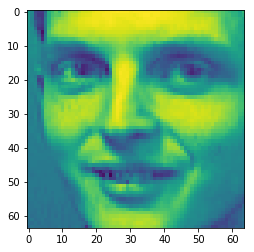

In [8]:
img = plt.imshow(X[399])

Anteriormente percebemos que nossas 400 imagens estão em um formato 64x64 e esse formato não é ideal para classificação, precisamos que nossas imagens tenham um formato unidimensional, para tal faremos um *reshape* no vetor X.

In [9]:
X_reshaped = np.reshape(X, (X.shape[0], X.shape[1] * X.shape[2]))

Observe que agora o nosso novo vetor **X_reshaped** possui imagens em uma única dimensão.

In [10]:
X_reshaped.shape

(400, 4096)

In [11]:
# Quantidade de pacotes para o KFold
qtdPacotesKFold = 10

#Instanciando um objeto KNN
knn = KNeighborsClassifier(n_neighbors = 3, algorithm='brute', weights='uniform')

#Instanciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = qtdPacotesKFold, shuffle=True)

#Vetores de métricas para o algoritmo do sklearn
vetorAcuraciasSklearn = []
vetorF1Sklearn = []
vetorPrecisaoSklearn = []
vetorRecallSklearn = []

#Rodando o Perceptron com o KFold
i = 0
for trainIndex, testIndex in objKFold.split(X):
    
    # Separando os dados de treinamento e teste
    i += 1
    xTrain, xTest, yTrain, yTest = X_reshaped[trainIndex], X_reshaped[testIndex], y[trainIndex], y[testIndex]
    
    # Treinando o classificador
    knn = knn.fit(xTrain, yTrain)
    
    # Predizendo os dados de teste
    yPredSklearn = knn.predict(xTest)
    
    
    # Verificando metricas no Sklearn
    vetorAcuraciasSklearn.append(accuracy_score(yTest, yPredSklearn))
    vetorF1Sklearn.append(f1_score(yTest, yPredSklearn, average='macro'))
    vetorPrecisaoSklearn.append(precision_score(yTest, yPredSklearn, average='macro'))
    vetorRecallSklearn.append(recall_score(yTest, yPredSklearn, average='macro'))
    
    print("Iteração", i, "finalizada")


/home/enginfo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/enginfo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/enginfo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/enginfo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


# Implementação realizada pelo grupo - Olivetti Faces

- Função de ordenação:

In [12]:
def OrdenaDistancias(distancias, coluna=1):
    """Esta função retorna as distâncias ordenadas."""
    return sorted(distancias, key=lambda coluna: coluna[1])

- Cálculo das distâncias:

In [13]:
def CalculoDistancia(vetor1, vetor2, p=2):
    """ Essa função implementa o cálculo da distância entre dois vetores utilizando a distância de Minkowski."""
    
    vector1 = np.array(vetor1)
    vector2 = np.array(vetor2)

    diferenca = vector2 - vector1
    
    dif_abs = np.abs(diferenca)
    
    distancia = (np.sum(diferenca**p))**(1/p)
    
    return distancia

- Implementação KNN:

In [14]:
def KNN_Ajuste_Predicao(X,Y,X_teste,k=5,p=2):
    
    predicao = []

    for i,ponto_teste in enumerate(X_teste):
    
        lista_distancias = []
    
        for j,ponto_treino in enumerate(X):

            distancia = CalculoDistancia(ponto_treino,ponto_teste,p=p)
        
            lista_distancias.append([j, distancia, Y[j]])
            
        vizinhos = OrdenaDistancias(lista_distancias)[:k]
        
        contagem = np.unique(np.array(vizinhos)[:,2], return_counts=True)
        
        moda = np.max(np.array(contagem),axis=1) 
        
        predicao.append(moda[0])
    
    return np.array(predicao)

- Aplicação:

In [15]:
# Quantidade de pacotes para o KFold
qtdPacotesKFold = 10

#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = qtdPacotesKFold, shuffle=True)

#Vetores de métricas para o algoritmo implementado
vetorAcuraciasImplementado = []
vetorF1Implementado = []
vetorPrecisaoImplementado = []
vetorRecallImplementado = []
#Rodando o Perceptron com o KFold
i = 0
for trainIndex, testIndex in objKFold.split(X):
    
    # Separando os dados de treinamento e teste
    i += 1
    xTrain, xTest, yTrain, yTest = X[trainIndex], X[testIndex], y[trainIndex], y[testIndex]
    
    #Predizendo os dados de teste
    Pred_Implementa = KNN_Ajuste_Predicao(xTrain, yTrain, xTest, k=3, p=2)
    
    
    # Verificando métricas no algoritmo implementado
    vetorAcuraciasImplementado.append(accuracy_score(yTest, Pred_Implementa))
    vetorF1Implementado.append(f1_score(yTest, Pred_Implementa, average='macro'))
    vetorPrecisaoImplementado.append(precision_score(yTest, Pred_Implementa, average='macro'))
    vetorRecallImplementado.append(recall_score(yTest, Pred_Implementa, average='macro'))
    
    
    print("Iteração", i, "finalizada")

/home/enginfo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/enginfo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/enginfo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/enginfo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


E em seguida utilizaremos algumas métricas para a avaliação do desempenho do classificador utilizado nesse problema como por exemplo a acurácia, o *F1 Score*, a precisão e o *recall*.

# Analisando as Métricas

## Acurácia

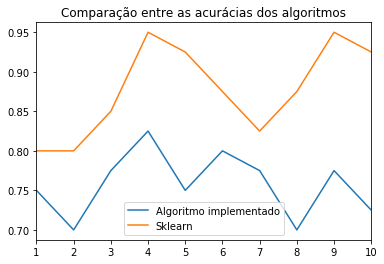

Acurácia média do algoritmo implementado: 0.7575000000000001
Acurácia média do KNN do Sklearn: 0.8775000000000001


In [16]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasSklearn, label="Sklearn")
plt.title("Comparação entre as acurácias dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoKNNAcuracia.png', format='png')
plt.show()

print("Acurácia média do algoritmo implementado:", np.mean(vetorAcuraciasImplementado))
print("Acurácia média do KNN do Sklearn:", np.mean(vetorAcuraciasSklearn))

## F1 Score

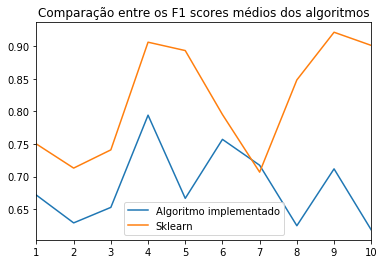

Média do F1 score médio do algoritmo implementado: 0.6843917212774232
Média do F1 score médio do KNN do Sklearn: 0.8176725962415619


In [17]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Implementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Sklearn, label="Sklearn")
plt.title("Comparação entre os F1 scores médios dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoKNNF1Score.png', format='png')
plt.show()

print("Média do F1 score médio do algoritmo implementado:", np.mean(vetorF1Implementado))
print("Média do F1 score médio do KNN do Sklearn:", np.mean(vetorF1Sklearn))

## Precisão

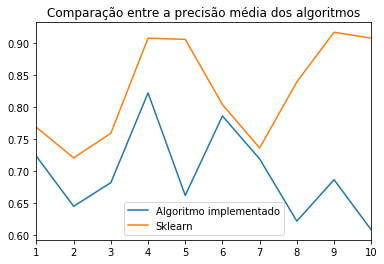

Média da precisão média do algoritmo implementado: 0.6950977552218514
Média da precisão média do KNN do Sklearn: 0.8262037037037038


In [18]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoSklearn, label="Sklearn")
plt.title("Comparação entre a precisão média dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoKNNPrecisao.png', format='png')
plt.show()

print("Média da precisão média do algoritmo implementado:", np.mean(vetorPrecisaoImplementado))
print("Média da precisão média do KNN do Sklearn:", np.mean(vetorPrecisaoSklearn))

## Recall

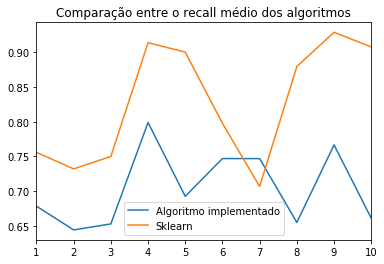

Média do recall médio do algoritmo implementado: 0.7044727993626074
Média do recall médio do KNN do Sklearn: 0.8271480265158427


In [19]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallSklearn, label="Sklearn")
plt.title("Comparação entre o recall médio dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoKNNRecall.png', format='png')
plt.show()

print("Média do recall médio do algoritmo implementado:", np.mean(vetorRecallImplementado))
print("Média do recall médio do KNN do Sklearn:", np.mean(vetorRecallSklearn))

# KNN SKLearn - Load_iris

Para uma análise melhor do modelo, utilizamos um dataset de menor dimensionalidade

In [20]:
dataset_iris = datasets.load_iris()

Atribuição das imagens do dataset a variável X_iris e dos elementos target a variável y_iris.

In [21]:
X_iris = dataset_iris.data
y_iris = dataset_iris.target

In [22]:
# Quantidade de pacotes para o KFold
qtdPacotesKFold = 10

#Instanciando um objeto KNN
knn_iris = KNeighborsClassifier(n_neighbors = 3, algorithm='brute', weights='uniform')

#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = qtdPacotesKFold, shuffle=True)

#Vetores de métricas para o algoritmo do sklearn
vetorAcuraciasSklearn = []
vetorF1Sklearn = []
vetorPrecisaoSklearn = []
vetorRecallSklearn = []

#Rodando o Perceptron com o KFold
i = 0
for trainIndex, testIndex in objKFold.split(X_iris):
    
    # Separando os dados de treinamento e teste
    i += 1
    xTrain, xTest, yTrain, yTest = X_iris[trainIndex], X_iris[testIndex], y_iris[trainIndex], y_iris[testIndex]
    
    # Treinando o classificador
    knn_iris.fit(xTrain, yTrain)
    
    # Predizendo os dados de teste
    yPredSklearn = knn_iris.predict(xTest)
    
    # Verificando metricas no Sklearn
    vetorAcuraciasSklearn.append(accuracy_score(yTest, yPredSklearn))
    vetorF1Sklearn.append(f1_score(yTest, yPredSklearn, average='macro'))
    vetorPrecisaoSklearn.append(precision_score(yTest, yPredSklearn, average='macro'))
    vetorRecallSklearn.append(recall_score(yTest, yPredSklearn, average='macro'))
    
    print("Iteração", i, "finalizada")

Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


# Implementação realizada pelo grupo - Load_iris

In [23]:
# Quantidade de pacotes para o KFold
qtdPacotesKFold = 10

#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = qtdPacotesKFold, shuffle=True)

#Vetores de métricas para o algoritmo implementado
vetorAcuraciasImplementado = []
vetorF1Implementado = []
vetorPrecisaoImplementado = []
vetorRecallImplementado = []
#Rodando o Perceptron com o KFold
i = 0
for trainIndex, testIndex in objKFold.split(X_iris):
    
    # Separando os dados de treinamento e teste
    i += 1
    xTrain, xTest, yTrain, yTest = X_iris[trainIndex], X_iris[testIndex], y_iris[trainIndex], y_iris[testIndex]
    
    #Predizendo os dados de teste
    Pred_Implementa = KNN_Ajuste_Predicao(xTrain, yTrain, xTest, k=3, p=2)
    
    
    # Verificando métricas no algoritmo implementado
    vetorAcuraciasImplementado.append(accuracy_score(yTest, Pred_Implementa))
    vetorF1Implementado.append(f1_score(yTest, Pred_Implementa, average='macro'))
    vetorPrecisaoImplementado.append(precision_score(yTest, Pred_Implementa, average='macro'))
    vetorRecallImplementado.append(recall_score(yTest, Pred_Implementa, average='macro'))
    
    
    print("Iteração", i, "finalizada")

Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


## Analisando as métricas

## Acurácia

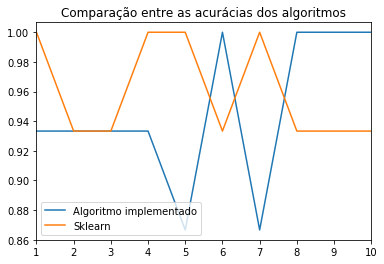

Acurácia média do algoritmo implementado: 0.9466666666666667
Acurácia média do KNN do Sklearn: 0.96


In [24]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasSklearn, label="Sklearn")
plt.title("Comparação entre as acurácias dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoKNNAcuraciaIris.png', format='png')
plt.show()

print("Acurácia média do algoritmo implementado:", np.mean(vetorAcuraciasImplementado))
print("Acurácia média do KNN do Sklearn:", np.mean(vetorAcuraciasSklearn))

## F1 Score

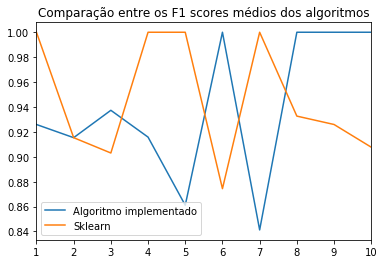

Média do F1 score médio do algoritmo implementado: 0.9396762204656941
Média do F1 score médio do KNN do Sklearn: 0.9459048519918085


In [25]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Implementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Sklearn, label="Sklearn")
plt.title("Comparação entre os F1 scores médios dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoKNNF1ScoreIris.png', format='png')
plt.show()

print("Média do F1 score médio do algoritmo implementado:", np.mean(vetorF1Implementado))
print("Média do F1 score médio do KNN do Sklearn:", np.mean(vetorF1Sklearn))

## Precisão

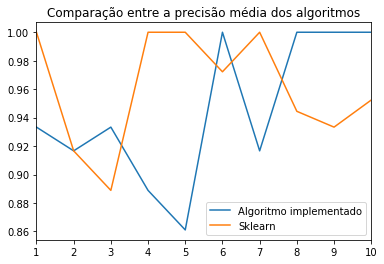

Média da precisão média do algoritmo implementado: 0.945
Média da precisão média do KNN do Sklearn: 0.9607936507936508


In [26]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoSklearn, label="Sklearn")
plt.title("Comparação entre a precisão média dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoKNNPrecisaoIris.png', format='png')
plt.show()

print("Média da precisão média do algoritmo implementado:", np.mean(vetorPrecisaoImplementado))
print("Média da precisão média do KNN do Sklearn:", np.mean(vetorPrecisaoSklearn))

## Recall

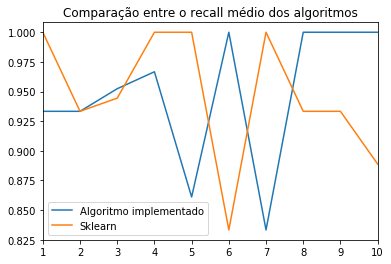

Média do recall médio do algoritmo implementado: 0.9480158730158731
Média do recall médio do KNN do Sklearn: 0.9466666666666667


In [27]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallSklearn, label="Sklearn")
plt.title("Comparação entre o recall médio dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoKNNRecallIris.png', format='png')
plt.show()

print("Média do recall médio do algoritmo implementado:", np.mean(vetorRecallImplementado))
print("Média do recall médio do KNN do Sklearn:", np.mean(vetorRecallSklearn))